# 1.2 The Unique Properties of Qubits

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

You now know something about bits, and about how our familiar digital computers work. All the complex variables, objects and data structures used in modern software are basically all just big piles of bits. Those of us who work on quantum computing call these *classical variables.* The computers that use them, like the one you are using to read this article, we call *classical computers*.

In quantum computers, our basic variable is the _qubit_: a quantum variant of the bit. These are quantum objects, obeying the laws of quantum mechanics. Unlike any classical variable, these cannot be represented by some number of classical bits. They are fundamentally different.


The purpose of this section is to give you your first taste of what a qubit is, and how they are unique. We'll do this in a way that requires essentially no math. This means leaving terms like 'superposition' and 'entanglement' until future sections, since it is difficult to properly convey their meaning without pointing at an equation.

Instead we will use another well-known feature of quantum mechanics: the uncertainty principle.

### Heisenberg's uncertainty principle

The most common formulation of the uncertainty principle refers to the position and momentum of a particle: the more precisely its position is defined, the more uncertainty there is in its speed, and vice-versa.

![](./images/heisenberg_xkcd.png)

This is a common feature of quantum objects, though it need not always refer to position and momentum. There are many possible sets of parameters for different quantum objects, where certain knowledge of one means that our observations of the others will be completely random.

To see how the uncertainty principle affects qubits, we need to look at measurement. As we saw in the last section, this is the method by which we extract a bit from a qubit.

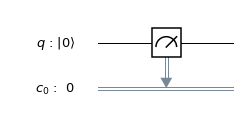

In [2]:
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

measure_z.draw(output='mpl')

On the [Circuit Composer](https://quantum-computing.ibm.com/composer), the same operation looks like this.

![A z measurement](https://s3.us-south.cloud-object-storage.appdomain.cloud/strapi/e8401fb5e3ff4cd18590010209203bc4uni1.png)

This version has a small ‘z’ written in the box that represents the operation. This hints at the fact that this kind of measurement is not the only one. In fact, it is only one of an infinite number of possible ways to extract a bit from a qubit. Specifically, it is known as a *z measurement*.

Another commonly used measurement is the *x measurement*. It can be performed using the following sequence of gates.

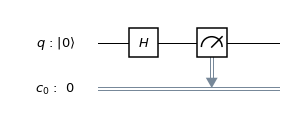

In [3]:
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

measure_x.draw(output='mpl')

Later chapters will explain why why this sequence of operations performs a new kind of measurement. For now, you'll need to trust us.

Like the position and momentum of a quantum particle, the z and x measurements of a qubit are governed by the uncertainty principle. If we are certain of the bit we'd get from a z measurement, then the results of an x measurement will always be completely random.

For example, here's a freshly initialized qubit.

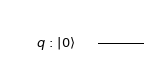

In [4]:
qc_0 = QuantumCircuit(1)

qc_0.draw(output='mpl')

Qubits are always initialized such that they are certain to give the result `0` for a z measurement. The resulting histogram will therefore simply have a single column, showing the 100% probability of getting a `0`.

Results for z measurement:


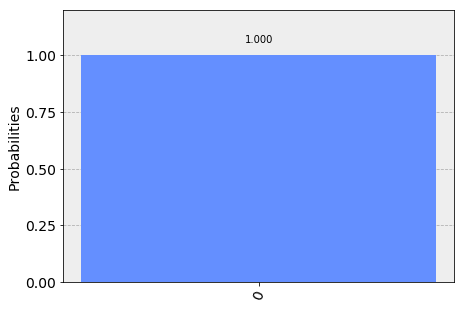

In [5]:
qc = qc_0 +  measure_z

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

If we instead do an x measurement, the results will be completely random.

Results for x measurement:


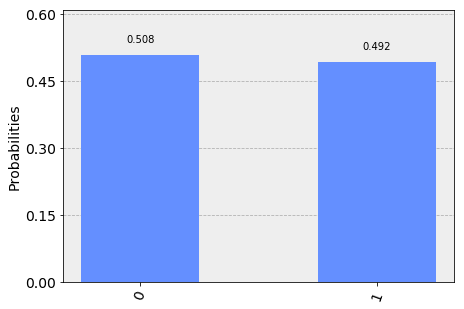

In [6]:
qc = qc_0 +  measure_x

print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Now we'll try a different circuit, that will give use very different behaviour.

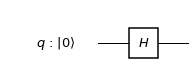

In [7]:
qc_plus = QuantumCircuit(1)
qc_plus.h(0)

qc_plus.draw(output='mpl')

First, let's try the z measurement.

Results for z measurement:


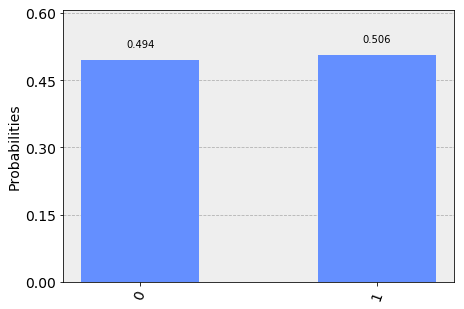

In [8]:
qc = qc_plus + measure_z

qc.draw()

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Here we see that, for this circuit, it is the results of the z measurement that are random.

Now let's see what happens for an x measurement.

Results for x measurement:


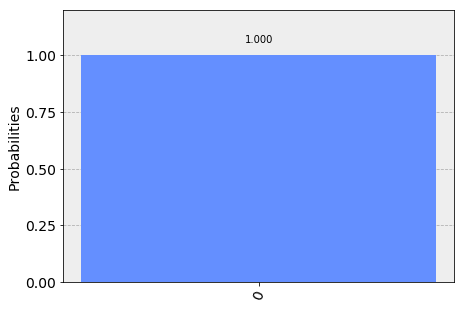

In [9]:
qc = qc_plus + measure_x

print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Here we see that, for x measurement, it is certain that the output for this circuit is `0`. The results for the circuit `qc_plus` are therefore entirely the opposite of what we saw in `qc_0`.

We can also find examples of circuits where the uncertainty is shared between the two.

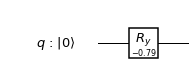

In [10]:
qc_y = QuantumCircuit(1)
qc_y.ry( -3.14159/4,0)

qc_y.draw(output='mpl')

For this, the z measurement is most likely to output `0`, and the x measurement is most likely to output `1`, but neither is completely certain.

Results for z measurement:


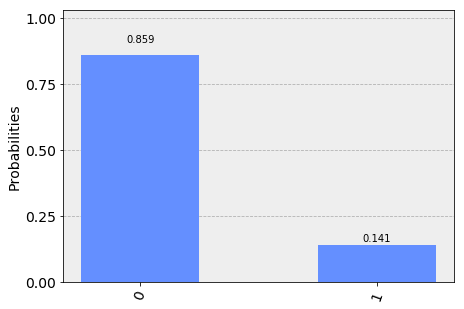

In [11]:
qc = qc_y + measure_z

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


Results for x measurement:


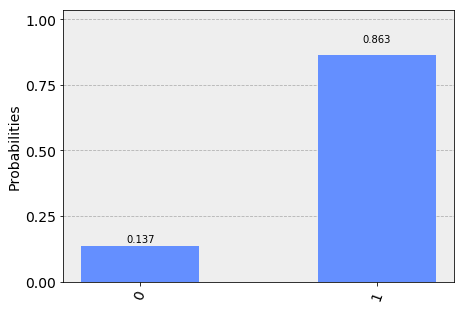

In [12]:
qc = qc_y + measure_x

print('\nResults for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

### Einstein vs. Bell

We have now played with some of the features of qubits, but we haven't done anything that couldn't be reproduced by a few bits and a random number generator. You can therefore be forgiven for thinking that quantum variables are just classical variables with some randomness bundled in.

This is essentially the claim made by Einstein, Podolsky and Rosen back in 1935. They objected to the uncertainty seen in quantum mechanics, and thought it meant that the theory was incomplete. They thought that a qubit should always know what output it would give for both kinds of measurement, and that it only seems random because some information is hidden from us. As Einstein said: God does not play dice with the universe.

No one spoke of qubits back then, and people hardly spoke of computers. But if we translate their arguments into modern language, they essentially claimed that qubits can indeed be described by some form of classical variable. They didn’t know how to do it, but they were sure it could be done. Then quantum mechanics could be replaced by a much nicer and more sensible theory.

It took until 1964 to show that they were wrong. J. S. Bell proved that quantum variables behaved in a way that was fundamentally unique. Since then, many new ways have been found to prove this, and extensive experiments have been done to show that this is exactly the way the universe works. We'll now consider a a simple demonstration, using a variant of _Hardy’s paradox_.

For this we need two qubits, set up in such a way they their results are correlated. Specifically, we want to set them up such that we see the following properties.

1. If z measurements are made on both qubits, they should never both output `0`.
2. For a z measurement of one qubit and an x measurement of the other, they should never both output `1`.

If we have qubits that satisfy these properties, what can we infer about the remaining case: an x measurement of both?

To answer this, let's think about what would happen if the x measurement of one qubit outputs a `1`. From property 2, we see that this means a z measurement of the other qubit would have output a `0`. So if the x measurements of both qubits output a `1`, we can infer that z measurements of both qubits would have output a `0`. Since this is impossible according to property 1, we can conclude that this result is impossible. Therefor, for a pair of qubits that satisfy these properties, it is impossible for an x measurement of both qubits to output a `1`.

The paragraph you just read contains all the math in this section. Don't feel bad if you need to read it a couple more times!

Now let's see what actually happens. Here is a circuit, composed of gates you will learn about in later sections, that prepares a pair of qubits that will satisfy the above properties.

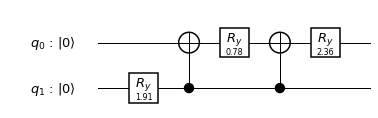

In [13]:
qc_hardy = QuantumCircuit(2)
qc_hardy.ry(1.911,1)
qc_hardy.cx(1,0)
qc_hardy.ry(0.785,0)
qc_hardy.cx(1,0)
qc_hardy.ry(2.356,0)

qc_hardy.draw(output='mpl')

Let's see it in action. First a z measurement of both qubits.


Results for two z measurements:


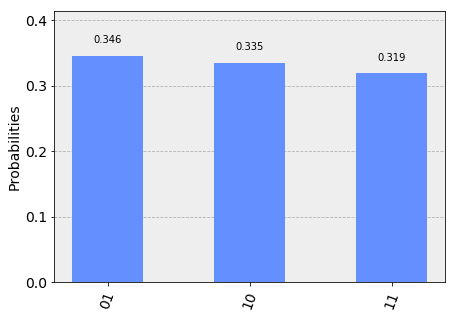

In [14]:
measurements = QuantumCircuit(2,2)
# z measurement on both qubits
measurements.measure(0,0)
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two z measurements:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The probability of `00` is zero, and so these qubits do indeed satisfy property 1.

Next, let's see the results of an x measurement of one and a z measurement of the other.


Results for two x measurement on qubit 0 and z measurement on qubit 1:


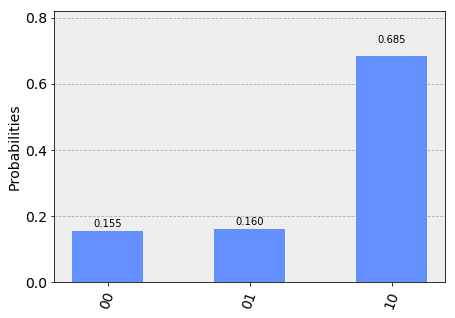

In [15]:
measurements = QuantumCircuit(2,2)
# x measurement on qubit 0
measurements.h(0)
measurements.measure(0,0)
# z measurement on qubit 1
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two x measurement on qubit 0 and z measurement on qubit 1:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The probability of `11` is zero. You'll see the same if you swap around the measurements. These qubits therefore also satisfy property 2.
 

Finally, let's look at an x measurement of both.


Results for two x measurement on both qubits:


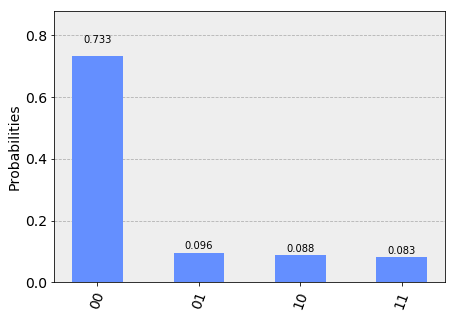

In [16]:
measurements = QuantumCircuit(2,2)
measurements.h(0)
measurements.measure(0,0)
measurements.h(1)
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two x measurement on both qubits:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

We reasoned that, given properties 1 and 2, it would be impossible to get the output `11` in this case. From the results above, we see that our reasoning was not correct: one in every dozen results will have this 'impossible' result.

So where did we go wrong? Our mistake was in the following piece of reasoning.

> if the x measurements of both qubits output a `1`, we can infer that z measurements of both qubits would have output a `0`.

We used our knowledge of the x outputs to work out what the z outputs were. Once we’d done that, we assumed that we were certain about the value of both. More certain than the uncertainty principle allows us to be. And so we were wrong.

Our logic would be completely valid if we weren’t reasoning about quantum objects. If it was some non-quantum variable, that we initialized by some random process, the x and z outputs would indeed both be well defined. They would just be based on some pre-determined list of random numbers in our computer, or generated by some deterministic process. Then there would be no reason why we shouldn't use one to deduce the value of the other, and our reasoning would be perfectly valid. The restriction it predicts would apply, and it would be impossible for both x measurements to output `1`.

But our qubits behave differently. The uncertainty of quantum mechanics allows qubits to dodge restrictions placed on classical variables. It allows them to do things that would otherwise be impossible. Indeed, this is the main thing to take away from this section:

> A physical system in a definite state can still behave randomly.

This is the first of the key principles of the quantum world. It needs to become your new intuition, as it is what makes quantum systems different to classical systems. It's what makes quantum computers able to outperform classical computers. It leads to effects that allow programs made with quantum variables to solve problems in ways than those with normal variables cannot. But just because qubits don’t follow the same logic as normal computers, it doesn’t mean they defy logic entirely. They obey the definite rules laid out by quantum mechanics.

If you’d like to learn these rules, we’ll use the remainder of this chapter to guide you through them. We'll also show you how to express them using math. This will provide a foundation for later chapters, in which we'll explain various quantum algorithms and techniques.